In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("supermarketsales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
fig = px.bar(df, x=df['Branch'].value_counts().keys(), y=df['Branch'].value_counts(),labels=dict(x="Branches",y="Number of Sales"))
fig.show()

All 3 Branches have a similar number of sales with Branch A edging out at the top with 340 sales compared with 332 B and 328 C

In [76]:
df_BR = df.groupby('Branch', as_index=False).Rating.mean()

fig = px.bar(df, x=df_BR['Branch'], y=df_BR['Rating'],labels=dict(x="Branches",y="Ratings (Avg)"))
fig.show()

Branches A and C are tied with the best average rating score of 7 while Branch B is a little less with an average of 6.8 but still pretty similar overall.

In [45]:
fig = px.bar(df, x=df['Payment'].value_counts().keys(), y=df['Payment'].value_counts(),labels=dict(x="Payment Methods",y="Number of Sales"))
fig.show()

E-Wallet and Cash were the most popular payment options compared to credit.

[None, None, None, None, None, None, None, None, None, None, None, None]

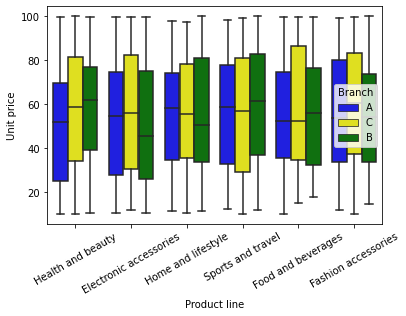

In [69]:
ax= sns.boxplot(x="Product line", y="Unit price",
            hue="Branch", palette=["blue", "yellow","green"],
            data=df)
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)

We can see that Branch C has higher unit prices across most product lines followed by Branch B then Branch A with the lowest unit prices.

In [75]:
df_PT = df.groupby('Product line', as_index=False).Total.mean()
fig = px.bar(df, x=df_PT['Product line'], y=df_PT['Total'],labels=dict(x="Product Line",y="Total Payment (Avg)"))
fig.show()


Home and Lifestyle products had the higest average of total payments across all product lines with an average of 336 followed by Sports and Travel with 332 and Health and beauty with with 323

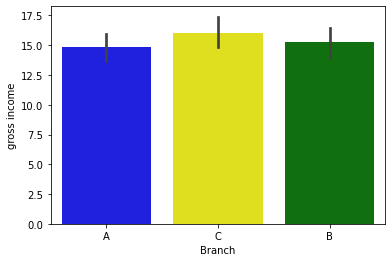

In [87]:
ax= sns.barplot(x="Branch", y="gross income"
            , palette=["blue", "yellow",'green'],
            data=df)



Branch C had higher gross income followed by Branch B then Branch A which makes sense because in a chart above Branch C was shown with higher Unit prices compared to the other branches.

In [89]:

fig = px.bar(df, x=df['Customer type'].value_counts().keys(), y=df['Customer type'].value_counts(),labels=dict(x="Customer Type",y="Number Customers"))
fig.show()

Number of normal customers and customers with memberships were pretty much the same.

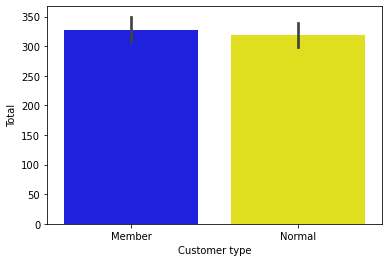

In [92]:
ax= sns.barplot(x="Customer type", y="Total"
            , palette=["blue", "yellow"],
            data=df)

In [96]:
df_CT = df.groupby('Customer type', as_index=False).Total.mean()

fig = px.bar(df, x=df_CT['Customer type'], y=df_CT['Total'],labels=dict(x="Customer Type",y="Total Payment"))
fig.show()

Normal customers and Member customers had pretty much the same avg of total payments so being a member didn't effect the total payment that much which indicates that member don't get special discounts or such things, actually our data showed that members had a bit higher total payments compared to normal customers.